# Introduction

Muhammad Bintang Ramadhan  
FTDS hacktiv8 batch8  
Graded Challenge 2

## Import Pustaka

In [42]:
import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image
from scipy import signal
import cv2 as cv2



## Data Loading

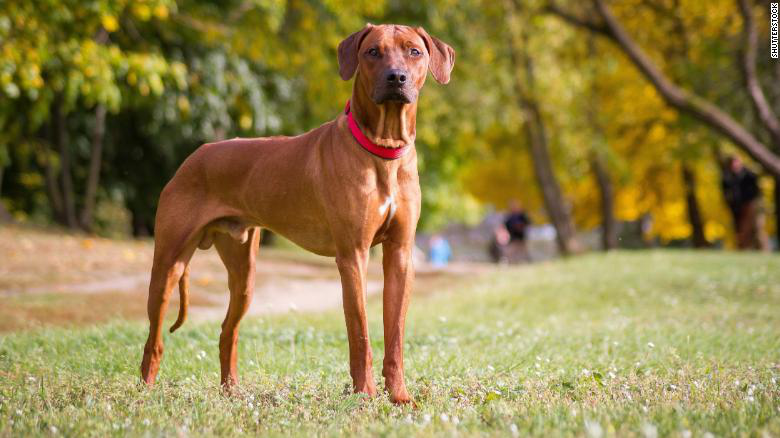

In [4]:
img = Image.open('img_dataset_gc2.jpg')
img

## Data Transformation and Image Data Exploration

In [45]:
print(img.size)
print(img.format)
print(img.mode)

(780, 438)
JPEG
RGB


In [5]:
image = Image.open('img_dataset_gc2.jpg') #open image
image = image.convert('L') #convert image ke grayscale
arr = np.array(image) #Mengubah gambar ke dalam bentuk array
arr


array([[ 85,  85,  83, ...,  40,  38,  51],
       [ 76,  76,  75, ...,  38,  56,  29],
       [ 64,  65,  65, ...,  48,  36,  60],
       ...,
       [150, 144, 134, ..., 136, 135, 131],
       [149, 142, 132, ..., 141, 139, 134],
       [149, 142, 131, ..., 146, 143, 136]], dtype=uint8)

## Calculus Implementation

In [6]:
#Gradient Vector
sx = np.array([[-1, 0, 1],[-2, 0, 2],[-1,0,1]]) #sobel operator sumbu x
sy = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]) #sobel operator sumbu y
jx = signal.convolve2d(arr, sx, mode='same') #konvolusi dari array grayscale dengan sx
jy = signal.convolve2d(arr, sy, mode='same') #konvolusi dari array grayscale dengan sy
#Gradient Magnitude
mag = np.sqrt(jx**2 + jy**2) 
mag

array([[335.41019662, 303.04125132, 300.23990408, ..., 176.10224303,
        179.4714462 , 174.41330224],
       [308.2985566 ,  79.0569415 ,  70.45565982, ...,  21.21320344,
         13.92838828, 186.68690366],
       [269.46613887,  70.0285656 ,  63.07138812, ..., 651.1113576 ,
        261.07853225, 164.43843833],
       ...,
       [576.03124915,  63.56099433,  74.95331881, ...,  15.23154621,
         25.05992817, 545.04495227],
       [570.01403491,  68.46897107,  71.56814934, ...,  39.11521443,
         42.44997055, 556.2912906 ],
       [612.43448629, 567.48039614, 533.63845439, ..., 559.00089445,
        553.65873966, 588.45050769]])

## Image Visualization

C:\Users\user\AppData\Local\Temp/ipykernel_4640/2460921864.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


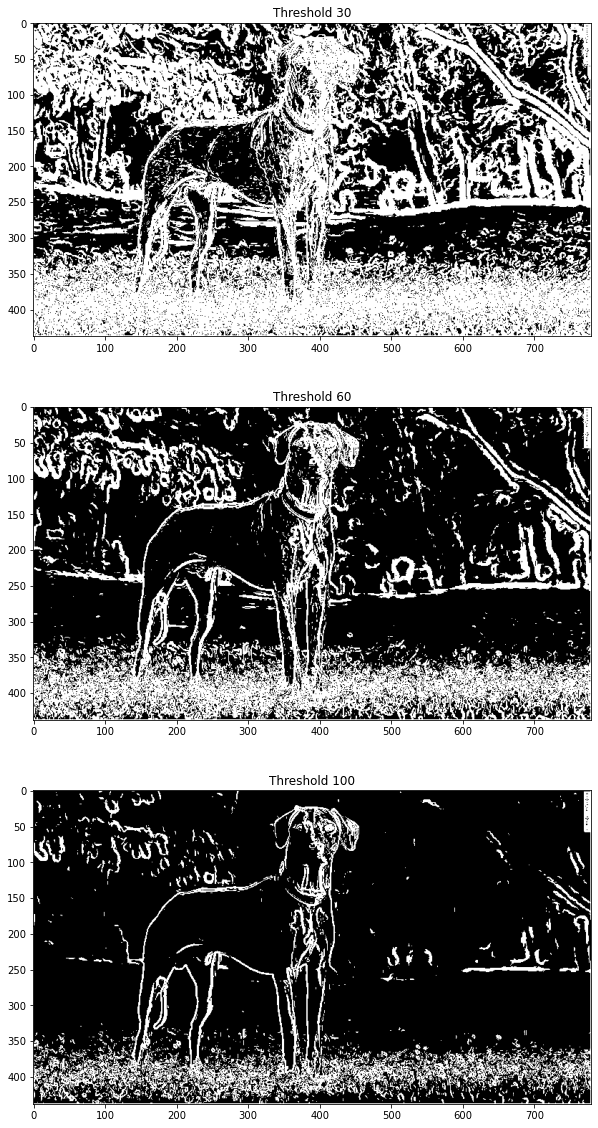

In [46]:
fig, (t_30, t_60, t_100) = plt.subplots(3, 1, figsize=(10, 20))

ret, mag_thresh30 = cv2.threshold(mag, 30, 255, cv2.THRESH_BINARY)
t_30.imshow(np.absolute(mag_thresh30), cmap='gray')
t_30.set_title('Threshold 30')

ret, mag_thresh60 = cv2.threshold(mag, 60, 255, cv2.THRESH_BINARY)
t_60.imshow(np.absolute(mag_thresh60), cmap='gray')
t_60.set_title('Threshold 60')

ret, mag_thresh100 = cv2.threshold(mag, 100, 255, cv2.THRESH_BINARY)
t_100.imshow(np.absolute(mag_thresh100), cmap='gray')
t_100.set_title('Threshold 100')

fig.show()

## Linear Algebra Implementation

In [9]:
mag.shape #Melihat ukuran gambar dari variable mag (hasil edge detection)

(438, 780)

In [39]:
mtrx = np.full((780, 300), 1) #Membuat matrix dengan 780 baris dan 300 kolom, dengan isi seluruh matrix adalah 1
mtrx

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [40]:
hasil_perkalian = mag@mtrx #Perkalian matrix dari mag = 438, 780 dan mtrx = 780, 300, yang berarti matrix bisa dikalikan karna kolom matrix mag adalah 780 dan baris matrix mtrx adalah 780
hasil_perkalian

array([[306439.42764988, 306439.42764988, 306439.42764988, ...,
        306439.42764988, 306439.42764988, 306439.42764988],
       [ 28313.71471912,  28313.71471912,  28313.71471912, ...,
         28313.71471912,  28313.71471912,  28313.71471912],
       [ 33444.76745968,  33444.76745968,  33444.76745968, ...,
         33444.76745968,  33444.76745968,  33444.76745968],
       ...,
       [ 42230.05440591,  42230.05440591,  42230.05440591, ...,
         42230.05440591,  42230.05440591,  42230.05440591],
       [ 40714.57724085,  40714.57724085,  40714.57724085, ...,
         40714.57724085,  40714.57724085,  40714.57724085],
       [530273.32700324, 530273.32700324, 530273.32700324, ...,
        530273.32700324, 530273.32700324, 530273.32700324]])

## Overall Analysis
Dapat disimpulkan bahwa gambar pendeteksian tepi dengan threshold 100 lebih jelas batas tepinya dari nilai threshold lainnya  
Threshold 30 lebih banyak warna putih dikarenakan lebih banyak pixel yang memiliki nilai lebih dari 30  
Threshold 60 masih sedikit lebih banyak warna putih dikarenakan lebih banyak pixel yang memiliki nilai lebih dari 60 sehingga menurut saya kurang jelas
